In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# data imported from:
# https://gs.statcounter.com/os-market-share/desktop/worldwide/#monthly-200901-202407

df = pd.read_csv("os_combined-ww-monthly-200901-202407.csv")
df["Date"] = pd.to_datetime(df["Date"])
os_list = [c for c in df.columns if c!="Date"]
print(os_list)

for os in os_list:
    df[os] = df[os]/100.

#df["NumDate"] = df["Date"].astype(int)
df["NumDate"] = df["Date"].transform(lambda x: x.toordinal())

display(df)

['Windows', 'OS X', 'Unknown', 'Linux', 'Chrome OS', 'iOS', 'Android', 'Playstation', 'Other']


,Date,Windows,OS X,Unknown,Linux,Chrome OS,iOS,Android,Playstation,Other,NumDate
0,2009-01-01,0.9542,0.0368,0.0017,0.0064,0.0000,0.0,0.0,0.0008,0.0002,733408
1,2009-02-01,0.9539,0.0376,0.0014,0.0062,0.0000,0.0,0.0,0.0007,0.0002,733439
2,2009-03-01,0.9522,0.0387,0.0016,0.0065,0.0000,0.0,0.0,0.0008,0.0002,733467
3,2009-04-01,0.9513,0.0392,0.0017,0.0066,0.0000,0.0,0.0,0.0010,0.0002,733498
4,2009-05-01,0.9525,0.0375,0.0024,0.0065,0.0000,0.0,0.0,0.0009,0.0002,733528
...,...,...,...,...,...,...,...,...,...,...,...
182,2024-03-01,0.7247,0.1468,0.0652,0.0405,0.0227,0.0,0.0,0.0000,0.0001,738946
183,2024-04-01,0.7350,0.1470,0.0534,0.0388,0.0256,0.0,0.0,0.0000,0.0001,738977
184,2024-05-01,0.7391,0.1490,0.0487,0.0377,0.0254,0.0,0.0,0.0000,0.0001,739007
185,2024-06-01,0.7281,0.1497,0.0623,0.0405,0.0193,0.0,0.0,0.0000,0.0001,739038


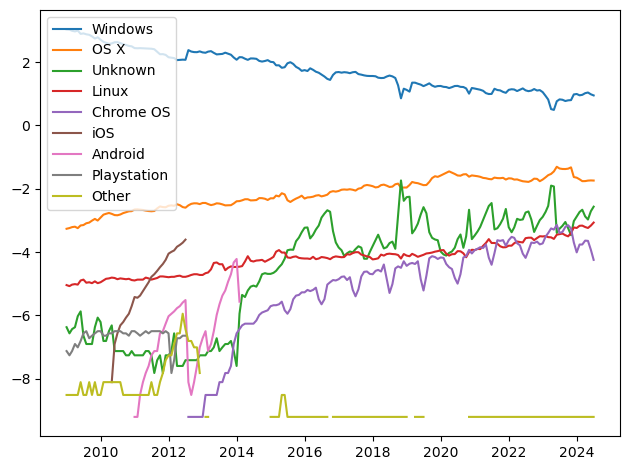

In [3]:
#df.plot()
logit = lambda x: np.log(x/(1-x))
inv_logit = lambda x: 1/(1+np.exp(-x))

fig, ax = plt.subplots(tight_layout=True)
for os in os_list:
    ax.plot(df["Date"], df[os].transform(logit), label=os)
    
ax.legend()

,Date,Windows,OS X,Unknown,Linux,Chrome OS,iOS,Android,Playstation,Other,NumDate,fit_Linux
0,2009-01-01,0.9542,0.0368,0.0017,0.0064,0.0000,0.0,0.0,0.0008,0.0002,733408,-5.010114
1,2009-02-01,0.9539,0.0376,0.0014,0.0062,0.0000,0.0,0.0,0.0007,0.0002,733439,-5.001347
2,2009-03-01,0.9522,0.0387,0.0016,0.0065,0.0000,0.0,0.0,0.0008,0.0002,733467,-4.993429
3,2009-04-01,0.9513,0.0392,0.0017,0.0066,0.0000,0.0,0.0,0.0010,0.0002,733498,-4.984663
4,2009-05-01,0.9525,0.0375,0.0024,0.0065,0.0000,0.0,0.0,0.0009,0.0002,733528,-4.976179
...,...,...,...,...,...,...,...,...,...,...,...,...
182,2024-03-01,0.7247,0.1468,0.0652,0.0405,0.0227,0.0,0.0,0.0000,0.0001,738946,-3.444011
183,2024-04-01,0.7350,0.1470,0.0534,0.0388,0.0256,0.0,0.0,0.0000,0.0001,738977,-3.435244
184,2024-05-01,0.7391,0.1490,0.0487,0.0377,0.0254,0.0,0.0,0.0000,0.0001,739007,-3.426760
185,2024-06-01,0.7281,0.1497,0.0623,0.0405,0.0193,0.0,0.0,0.0000,0.0001,739038,-3.417994


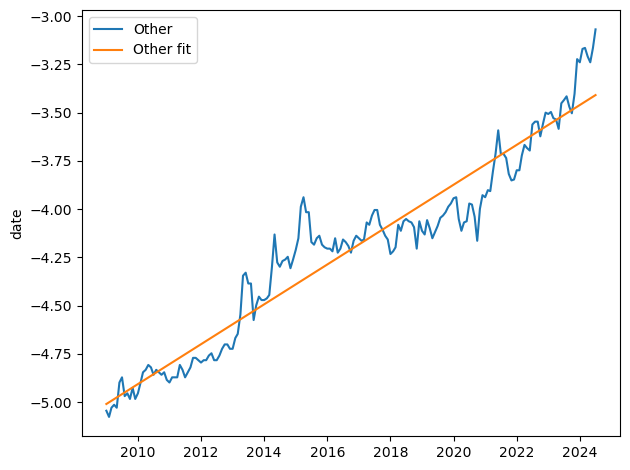

In [4]:
fit = np.polyfit(df["NumDate"], df["Linux"].transform(logit), 1)
fit_func = lambda numdate: numdate*fit[0] + fit[1]

df["fit_Linux"] = df["NumDate"].transform(fit_func)

fig, ax = plt.subplots(tight_layout=True)
ax.plot(df["Date"], df["Linux"].transform(logit), label=os)
ax.plot(df["Date"], df["fit_Linux"], label=os+" fit")

ax.set_ylabel("logit")
ax.set_ylabel("date")

ax.legend()

for f in ["pdf", "png"]:
    plt.savefig(f"linux_logit.{f}")

display(df)

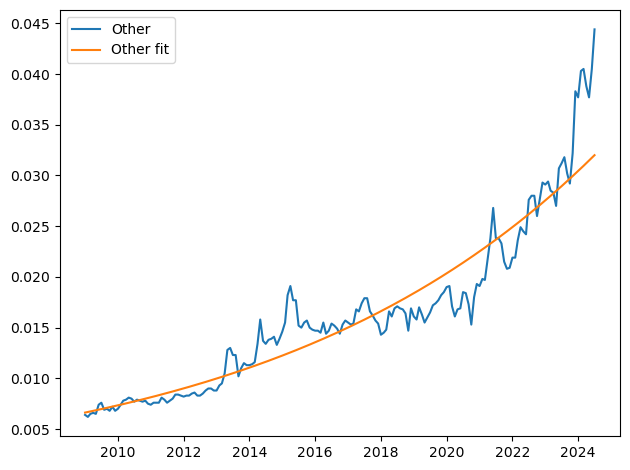

In [5]:
fig, ax = plt.subplots(tight_layout=True)
#for os in os_list:
ax.plot(df["Date"], df["Linux"], label=os)
ax.plot(df["Date"], df["fit_Linux"].transform(inv_logit), label=os+" fit")
    
ax.legend()

for f in ["pdf", "png"]:
    plt.savefig(f"linux_linear.{f}")




In [6]:
future = 680

# Create future dates
last_date = df['Date'].max()
future_dates = [last_date + DateOffset(months=x) for x in range(1, future + 1)]
future_dates_ordinal = [date.toordinal() for date in future_dates]

future_df = pd.DataFrame({
    'Date': future_dates,
    'NumDate': future_dates_ordinal
})

combo_df = pd.concat([df, future_df])
combo_df['fit_Linux'] = combo_df["NumDate"].transform(fit_func)

#display(df)


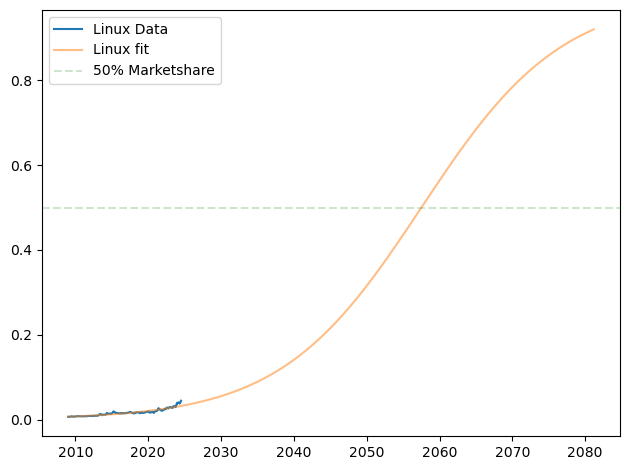

In [7]:
fig, ax = plt.subplots(tight_layout=True)
#for os in os_list:
ax.plot(combo_df["Date"].loc[~combo_df["Linux"].isna()], combo_df["Linux"].loc[~combo_df["Linux"].isna()], label="Linux Data")
ax.plot(combo_df["Date"], combo_df["fit_Linux"].transform(inv_logit), label="Linux fit", alpha=0.5)

ax.axhline(0.5, color="green", alpha=0.2, linestyle="--", label="50% Marketshare")

ax.legend()

for f in ["pdf", "png"]:
    plt.savefig(f"linux_projection.{f}")


# display(df["Date"].loc[~df["Linux"].isna()])